**R and Python**

In [3]:
!pip install rpy2==3.5.1

In [4]:
%load_ext rpy2.ipython

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
%%R
if (!require("ggplot2")) install.packages("ggplot2")
library(ggplot2)
if (!require("igraph")) install.packages("igraph")
library ("igraph")
if (!require("pracma")) install.packages("pracma")
library('pracma')

R[write to console]: Loading required package: ggplot2

R[write to console]: Installing package into ‘/opt/homebrew/lib/R/4.4/site-library’
(as ‘lib’ is unspecified)



--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Guangzhou) [https]
20: China (Jinan) [https]
21: China (Lanzhou) [https]
22: China (Nanjing) [https]
23: China (Shanghai 2) [https]
24: China (Shenzhen) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Marseille) [http

In [2]:
%%R
fb_combined1 <- read.table("/Users/parthakundu/GitHub/a-ucla-ece-232e-project2/dataFiles/facebook_combined.txt")
g1 = graph.edgelist(as.matrix(fb_combined1)+1, directed=FALSE)

fprintf('The number of nodes: %d\n', vcount(g1))
fprintf('The number of edges: %d\n', ecount(g1))
fprintf('Network Connected: %s\n', is_connected(g1))

UsageError: Cell magic `%%R` not found.


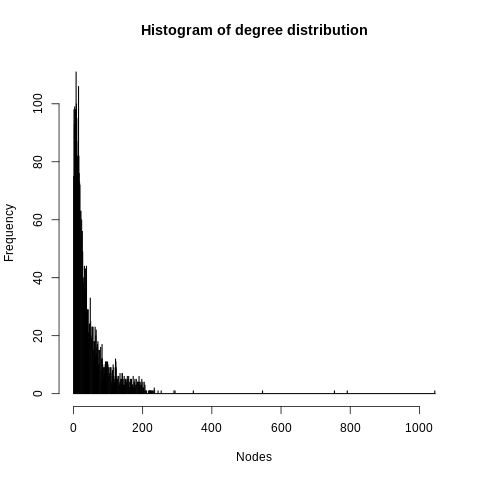

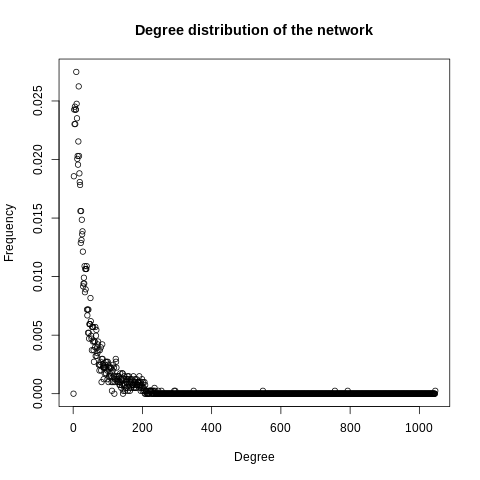

In [39]:
%%R
y = degree(g1)
mean(y)
h1 = hist(y, breaks=seq(0.0, by=1 , length.out=max(y)+2),xlab="Nodes",main="Histogram of degree distribution")
plot(degree.distribution(g1),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")

**Python**

In [1]:
!pip install igraph
!pip install networkx

In [22]:
import networkx as nx
import igraph as ig

fb_combined2 = nx.read_edgelist('/content/drive/My Drive/ECE232E/P2/facebook_combined.txt', create_using = nx.Graph(), nodetype=int)
g2 = ig.Graph.from_networkx(fb_combined2)

print('Number of Edges',g2.ecount())
print('Number of Nodes',g2.vcount())

print('Network Connected:', g2.is_connected())

Number of Edges 88234
Number of Nodes 4039
Network Connected: True


**Personalized Network**

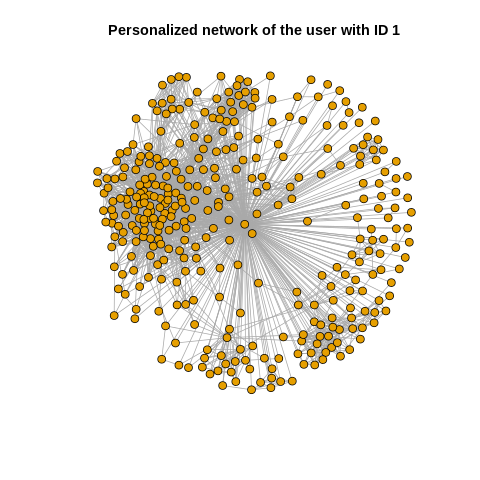

In [35]:
%%R
network_id1 = make_ego_graph(g1, order=1, nodes = V(g1)[1])[[1]]
plot(network_id1, vertex.size=5, vertex.label=NA, main="Personalized network of the user with ID 1")

In [36]:
%%R
fprintf('The number of nodes: %d\n', vcount(network_id1))
fprintf('The number of edges: %d\n', ecount(network_id1))

The number of nodes: 348
The number of edges: 2866


Fast-Greedy: 0.413101


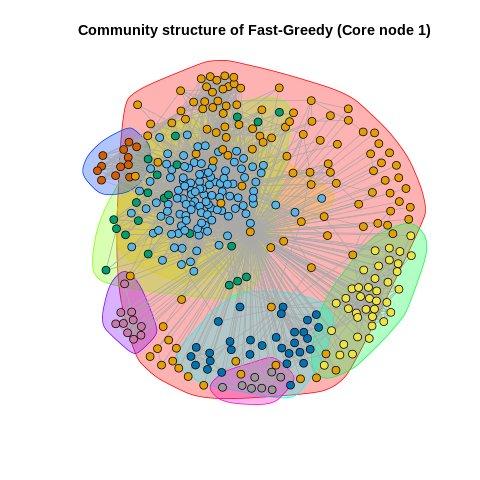

In [38]:
%%R
core_network = induced.subgraph(g1, c(1, neighbors(g1, 1)))
fast_greedy_com = fastgreedy.community(core_network)
fprintf('Fast-Greedy: %f\n', modularity(fast_greedy_com))
plot(core_network, mark.groups=groups(fast_greedy_com),
     vertex.size=5, vertex.label=NA, vertex.color=fast_greedy_com$membership,
     main=sprintf("Community structure of Fast-Greedy (Core node %s)", 1))